# Inteligência Artificial e Computacional

## Global Solution 1/2022: Electric Cars

Professor: Henrique Ferreira 

Entrega: ***até 23h55 de 07/06/2021 - via portal FIAP***

Em caso de dúvidas ,entrar em contato com o professor.

*Boa Prova!*

------------------------------

## Objetivo:

Aprender sobre o mercado de carros elétricos. Usar inteligência artificial para auxiliar nessa tarefa.

## Instruções: 

* Dataset: ElectricCarData.csv

* Utilize o sklearn conforme exemplos vistos em aula. Sempre que necessário, consulte a documentação.

* Grupo de 3 alunos.


## Questões:
* 5 Questões com pontuações indicadas, sobre Análise Exploratória, Regressão, Classificação e Agrupamento.



## Entregável: 
 - Este Jupyter Notebook com as análises e conclusões das perguntas.
 
------------------------------------------------------

# Nomes: RM:

- Leandro de Jesus Luna 86492
- Pedro Fernandes 84244
- Fabbio Augusto de Souza Moura Boli 84695

------------------------------------------------------

In [767]:
# Bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score

In [768]:
# Somente utilizar com google colab. 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Questão 1: Análise Exploratória <font color='red'> (3.25 pontos) </font>

Para todas os subitens, considere que as perguntas devem ser respondidas na ordem, i.e., o processamento anterior interfere no resultado do item subsequente.

- (a) Carregue os dados ElectricCarData.csv
- (b) Quantas colunas e quantas linhas existem no dataset inicialmente?
- (c) Transforme a coluna FastCharge_KmH em numérica. Elimine casos em que isso não é possível.
- (d) Transforme a coluna RapidCharge em númerica (0 No, 1 Yes).
- (e) Quantos carros tem Carga Rápida (RapidCharge == 1)? E inicialmente?
- (f) Qual é a média de preço dos carros? Em média, qual é a marca mais barata e a marca mais cara?
- (g) Qual é o carro mais caro e o carro mais barato? 
- (h) Faça o pairplot dos dados pintado pelo tipo de tração (PowerTrain).
- (i) Calcule os parâmetros numéricos médios para cada tipo de tração (PowerTrain).
- (j) Faça um boxplot da aceleração (AccelSec), da máxima velocidade (TopSpeed_KmH), da eficiência (Efficiency_WhKm) e da recarga (FastCharge_KmH) colorido pelo tipo de tração. Estatisticamente, qual tração é melhor?

In [769]:
## A)
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GS1/ElectricCarData.csv") # Alterar!
print('Carregados os dados do arquivo .csv e transformados em DataFrame utilizando a biblioteca pandas.')
data

Carregados os dados do arquivo .csv e transformados em DataFrame utilizando a biblioteca pandas.


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [770]:
## B)
print('Método retorna a dimensionalidade do DataFrame; 103 linhas e 14 colunas.')
data.shape

Método retorna a dimensionalidade do DataFrame; 103 linhas e 14 colunas.


(103, 14)

In [771]:
## C)
data['FastCharge_KmH'] = pd.to_numeric(data['FastCharge_KmH'],errors = 'coerce')
data = data.dropna()
print('Recriar a coluna FastCharge_KmH transformando os valores em númericos e substituindo os casos que não é possível em NaN. Logo após, evocado o método .dropna para \n eliminar as linhas que não foi possível a transformata.')
data

Recriar a coluna FastCharge_KmH transformando os valores em númericos e substituindo os casos que não é possível em NaN. Logo após, evocado o método .dropna para 
 eliminar as linhas que não foi possível a transformata.


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620.0,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560.0,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190.0,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440.0,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540.0,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440.0,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450.0,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [772]:
## D)
def convertRapidCharge(foo):
    if foo == 'No':
        return 0
    else:
        return 1
    
data['RapidCharge'] = data['RapidCharge'].apply(convertRapidCharge)
print('Executa a função convertRapidCharge ao longo de um eixo (por padrão é sob uma coluna) e converte os dados "No" para 0 e "Yes" para 1.')
data 

Executa a função convertRapidCharge ao longo de um eixo (por padrão é sob uma coluna) e converte os dados "No" para 0 e "Yes" para 1.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,1,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,1,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620.0,1,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560.0,1,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190.0,1,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440.0,1,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540.0,1,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440.0,1,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450.0,1,AWD,Type 2 CCS,Hatchback,C,5,65000


In [773]:
## E)
print('Retorna o número de vezes que o valor 1 é encontrado. Conclui-se então que, do DataFrame inicial (103 veículos), 98 veículos tem RapidCharge.\nLogo, os veículos que não foram possível transformar os valores dos atributos da coluna FastCharge_KmH não tinham RapidCharge.')
list(data['RapidCharge']).count(1)

Retorna o número de vezes que o valor 1 é encontrado. Conclui-se então que, do DataFrame inicial (103 veículos), 98 veículos tem RapidCharge.
Logo, os veículos que não foram possível transformar os valores dos atributos da coluna FastCharge_KmH não tinham RapidCharge.


98

In [774]:
## F)
print(f'Média de valor dos carros: {data["PriceEuro"].mean()}')

Média de valor dos carros: 57324.683673469386


In [775]:
print('A média de preço dos veículos é de €57324. Também, a maior média de preço por marca é a Lightyear (€149000) e menor média é a SEAT (€20219).')
data.groupby('Brand')['PriceEuro'].mean().sort_values(ascending=False)

A média de preço dos veículos é de €57324. Também, a maior média de preço por marca é a Lightyear (€149000) e menor média é a SEAT (€20219).


Brand
Lightyear      149000.000000
Porsche        138265.800000
Lucid          105000.000000
Audi            80593.666667
Tesla           80272.307692
Jaguar          75351.000000
Mercedes        61705.000000
Volvo           60437.000000
Byton           59833.333333
Polestar        56440.000000
Ford            54568.750000
BMW             53145.750000
Lexus           50000.000000
Nissan          45902.125000
CUPRA           45000.000000
Citroen         40000.000000
Skoda           38255.666667
DS              37422.000000
Hyundai         36408.333333
Fiat            36400.000000
Aiways          36057.000000
Kia             35862.400000
Opel            35350.666667
Volkswagen      34602.375000
Honda           34459.000000
Mazda           32646.000000
Peugeot         32021.500000
Mini            31681.000000
Renault         31183.666667
MG              30000.000000
Sono            25500.000000
SEAT            20129.000000
Name: PriceEuro, dtype: float64

In [776]:
## G)
print('O veículo mais caro é o de modelo Roadster com um valor de €215000: ')
data.loc[data['PriceEuro'] == data['PriceEuro'].max()]

O veículo mais caro é o de modelo Roadster com um valor de €215000: 


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
51,Tesla,Roadster,2.1,410,970,206,920.0,1,AWD,Type 2 CCS,Cabrio,S,4,215000


In [777]:
print('O veículo mais barato é o de modelo Mii Electric, €20129.')
data.loc[data['PriceEuro'] == data['PriceEuro'].min()]

O veículo mais barato é o de modelo Mii Electric, €20129.


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
44,SEAT,Mii Electric,12.3,130,195,166,170.0,1,FWD,Type 2 CCS,Hatchback,A,4,20129


seaborn.pairplot() resulta na plotagem de gráfico em pares do dataset passado como parâmetro. O parâmetro hue pinta os gráficos dada uma coluna especifica.


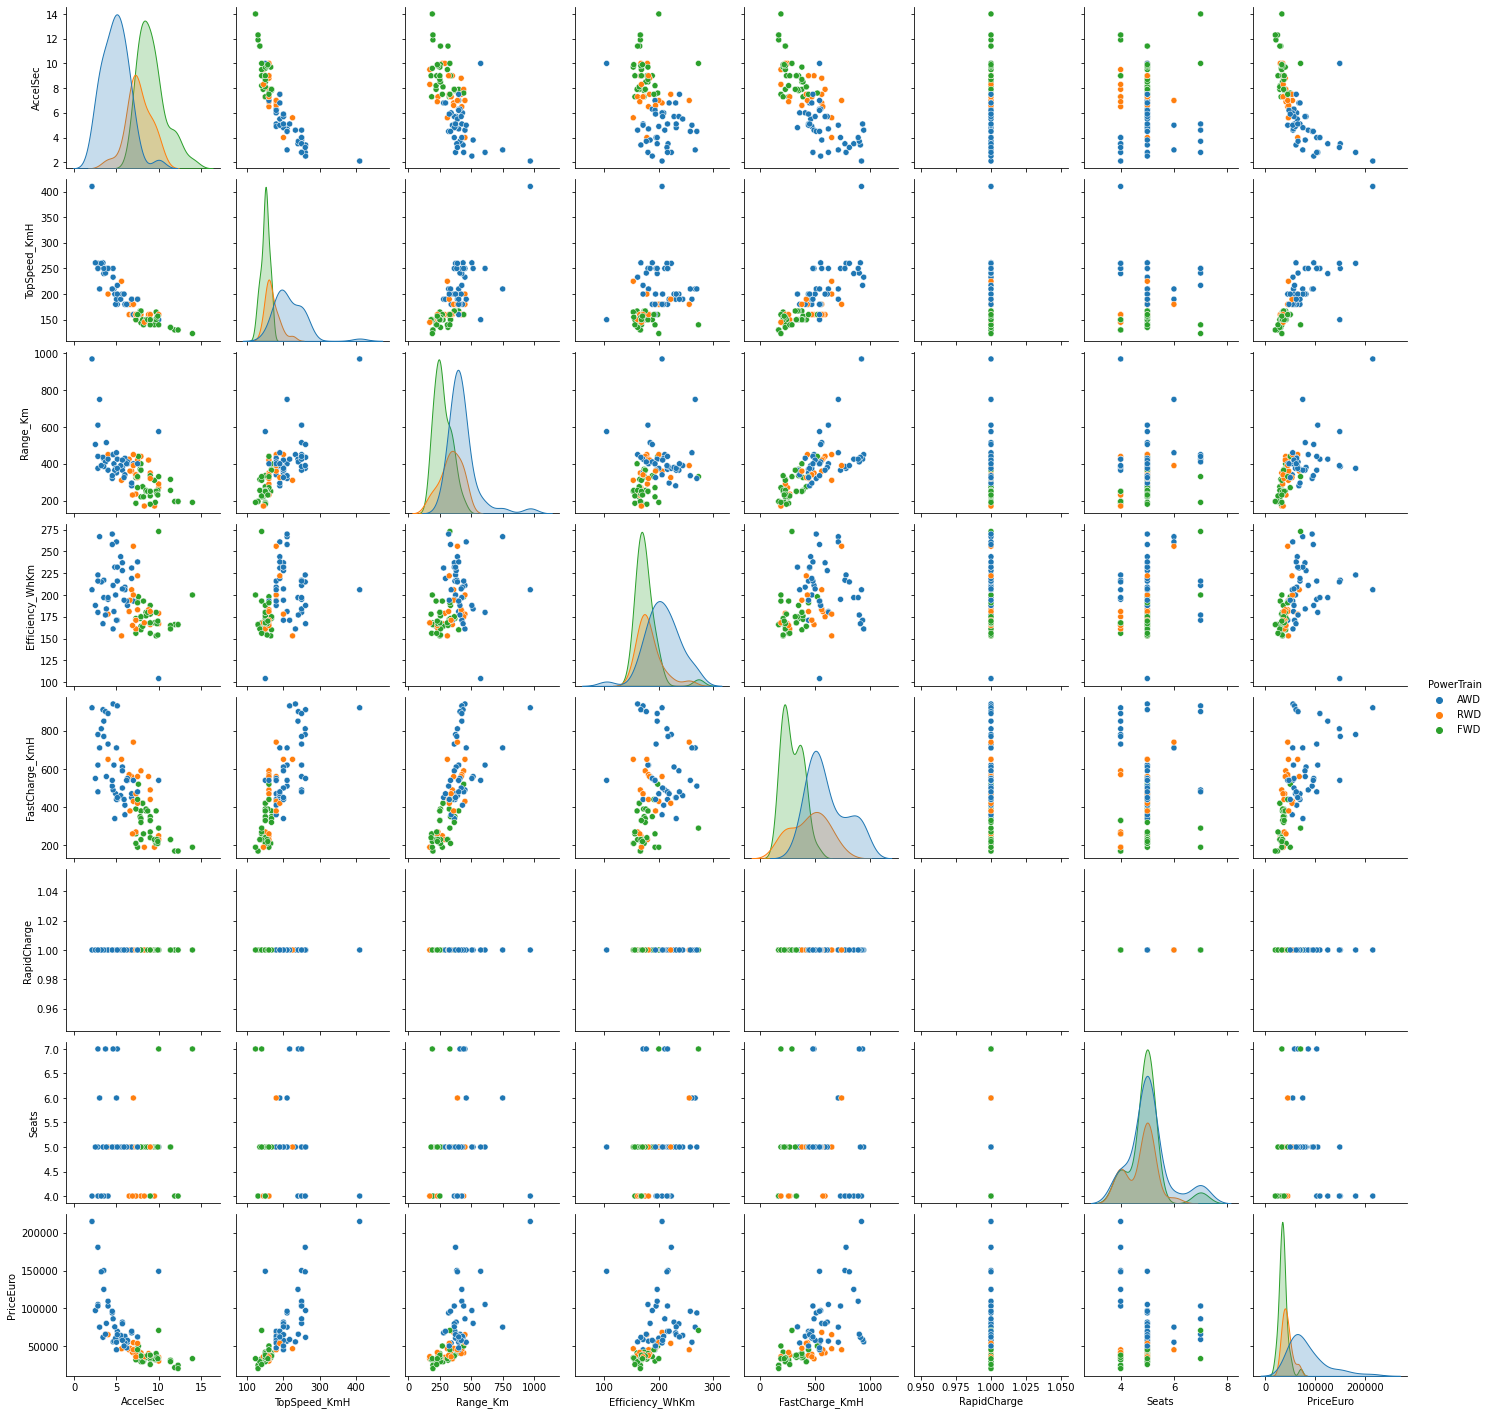

In [778]:
## H) 
print('seaborn.pairplot() resulta na plotagem de gráfico em pares do dataset passado como parâmetro. O parâmetro hue pinta os gráficos dada uma coluna especifica.')
sns.pairplot(data, hue="PowerTrain")

In [779]:
## I)
print('Média de agrupamento com base na tração. A tração AWD se sobressai: ')
data.groupby('PowerTrain').mean()

Média de agrupamento com base na tração. A tração AWD se sobressai: 


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro
PowerTrain,,,,,,,,
AWD,4.887805,216.902439,426.463415,206.756098,605.853659,1.0,5.073171,83840.097561
FWD,9.177778,149.277778,271.250000,175.055556,293.055556,1.0,4.944444,35322.805556
RWD,7.609524,168.333333,336.428571,182.285714,446.190476,1.0,4.761905,43274.000000


### I) Conclusão

Diante do exposto nos códigos dos itens (i) e (j), os veículos que melhores performam são aqueles com tração AWD - apesar de serem os de maior média de valor,
justica-se baseado nas média das outras métricas.


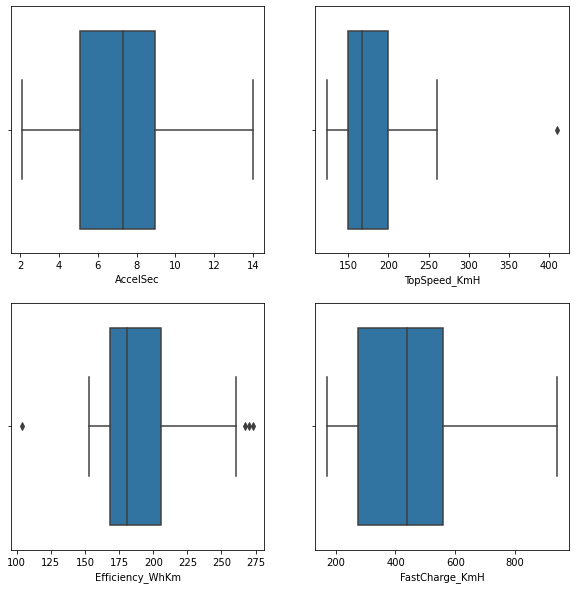

In [780]:
## J)
print('Diante do exposto nos códigos dos itens (i) e (j), os veículos que melhores performam são aqueles com tração AWD - apesar de serem os de maior média de valor,\njustica-se baseado nas média das outras métricas.')
fig, axes = pyplot.subplots(2, 2, figsize=(10, 10))

sns.boxplot(ax=axes[0][0],
            data=data,  
            x = data['AccelSec'], 
            hue = data['PowerTrain']
            )

sns.boxplot(ax=axes[0][1],
            data=data,  
            x = data['TopSpeed_KmH'], 
            hue = data['PowerTrain']
            )

sns.boxplot(ax=axes[1][0],
            data=data,  
            x = data['Efficiency_WhKm'],
            hue = data['PowerTrain']
            )

sns.boxplot(ax=axes[1][1],
            data=data,  
            x = data['FastCharge_KmH'],   
            hue = data['PowerTrain']
            )

-------------------------
## Questão 2: Use um algoritmo de Machine Learning para classificar o tipo de tração do veículo baseado em seus outros parâmetros. Gere a matriz de confusão. A acurácia deve ser maior do que 80%. <font color='red'> (2 pontos) </font>

Adote a metodologia 80/20 de separação treino e teste, e use o parâmetro stratify durante a separação.

In [781]:
x = data.drop(columns = ['Brand', 'Model','PowerTrain','PlugType','BodyStyle', 'Segment', 'RapidCharge'])
y = data['PowerTrain']

In [782]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0, stratify=y)

In [783]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [784]:
LR = LogisticRegression()
LR.fit(x_train_scaled, y_train)
y_predicted = LR.predict(x_test_scaled)
y_predicted

array(['FWD', 'FWD', 'AWD', 'FWD', 'FWD', 'AWD', 'AWD', 'AWD', 'RWD',
       'AWD', 'AWD', 'AWD', 'FWD', 'FWD', 'FWD', 'AWD', 'AWD', 'AWD',
       'AWD', 'FWD'], dtype=object)

<Figure size 1440x360 with 0 Axes>

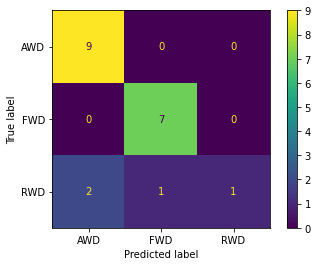

In [785]:
conf_matrix = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicted,
                                   labels=['AWD','FWD','RWD'])

figure = pyplot.figure(figsize=(20, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['AWD','FWD','RWD'])
disp.plot() 

In [786]:
print(classification_report(y_test, y_predicted))
print(f"Acurácia: {accuracy_score(y_test,y_predicted)*100}%")

              precision    recall  f1-score   support

         AWD       0.82      1.00      0.90         9
         FWD       0.88      1.00      0.93         7
         RWD       1.00      0.25      0.40         4

    accuracy                           0.85        20
   macro avg       0.90      0.75      0.74        20
weighted avg       0.87      0.85      0.81        20

Acurácia: 85.0%


-------------------------
## Questão 3: Escolha um algoritmo de Clusterização e explique como ele funciona. Qual a diferença entre Clusterização e Classificação? <font color='red'> (1.75 pontos) </font>


## Algoritmo de clusterização: Gaussian Mixture Model

Um modelo de mistura gaussiana é uma distribuição montada a partir de distribuições gaussianas multivariadas ponderadas. Os fatores de ponderação atribuem a cada distribuição diferentes níveis de importância. O modelo resultante é uma superposição de curvas, como representado na figura: 

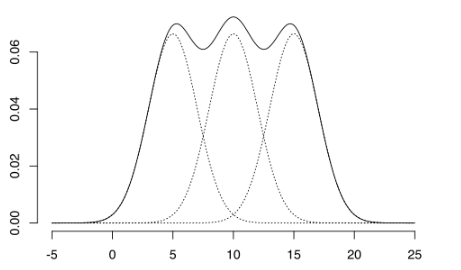

Os modelos de mistura gaussiana são semi-paramétricos; isso implica que o modelo vem de uma distribuição já conhecida (neste caso, um conjunto de distribuições normais). É semi-paramétrico porque mais componentes, possivelmente de distribuições desconhecidas, podem ser adicionados ao modelo.

## Clusterização x Classificação

A principal diferença entre algoritmos de Clusterização e Classificação é que, enquanto um é uma técnica de aprendizado não supervisionado (Classificação), o outro é uma técnica de aprendizado supervisionado (Clusterização). 

Ambos as técnicas funcionam com um fim comum: agrupar dados. 

Contudo, a maneira que ocorre esse agrupamento é distinta. Ao passo que algoritmos de Classificação já sabem previamente a classe onde esses dados devem ser atribuidos, nos algoritmos de Clusterização devem-se descobrir esses grupos com bases nos atributos do dataset. 

-------------------------
## Questão 4: Use um algoritmo de Machine Learning para predizer o preço do carro  baseado em seus parâmetros. Seu erro absoluto médio deve ser menor do que 10 mil euros. <font color='red'> (1.5 pontos) </font>

Adote a metodologia 80/20 de separação treino e teste.

In [787]:
x = data.drop(columns = ['Brand', 'Model','PowerTrain','PlugType','BodyStyle', 'Segment', 'PriceEuro', 'RapidCharge'])
y = data['PriceEuro']

In [788]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [789]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [790]:
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(x_train_scaled, y_train)
y_predicted = DTR.predict(x_test_scaled)
y_predicted

array([67358., 65620., 93800., 33133., 37900., 67358., 85990., 57500.,
       67358., 65620., 36837., 67358., 85990., 31184., 24534., 35921.,
       33133., 31184., 38987., 29234.])

In [791]:
R2model1 = r2_score(y_true = y_test, y_pred = y_predicted) 

print(f'R2: {R2model1}')  
print(f'MAE: {mean_absolute_error(y_true = y_test, y_pred = y_predicted)}')
print(f'MSE: {mean_squared_error(y_true = y_test, y_pred = y_predicted)}')

R2: 0.8449272841611971
MAE: 7671.9
MSE: 108275325.4


-------------------------
## Questão 5: Existe uma relação aproximadamente exponecial entre o preço e um dos parâmetros de performance do veículo. Transforme os dados para que seu método preditor dos preços tenha uma MAE < 7 mil euros. Qual a diferença de R² entre a questão 4 e 5? <font color='red'> (1.5 pontos) </font>

Dica: use a operação inversa do exponencial para linearlizar a coluna. Observe que a base natural dos preços cresce na ordem de 10. Use o numpy para chamar a operação em questão. Defina uma função que aplique ela sobre a coluna a ser transformada.

In [792]:
data['Log10'] = np.log10(data['PriceEuro'])
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Log10
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,1,AWD,Type 2 CCS,Sedan,D,5,55480,4.744136
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,1,RWD,Type 2 CCS,Hatchback,C,5,30000,4.477121
2,Polestar,2,4.7,210,400,181,620.0,1,AWD,Type 2 CCS,Liftback,D,5,56440,4.751587
3,BMW,iX3,6.8,180,360,206,560.0,1,RWD,Type 2 CCS,SUV,D,5,68040,4.832764
4,Honda,e,9.5,145,170,168,190.0,1,RWD,Type 2 CCS,Hatchback,B,4,32997,4.518474


In [793]:
x = data.drop(columns = ['Brand', 'Model','PowerTrain','PlugType','BodyStyle', 'Segment', 'PriceEuro', 'RapidCharge', 'Log10'])
y = data['Log10']

In [794]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [795]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [799]:
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(x_train_scaled, y_train)
y_pred = DTR.predict(x_test_scaled) 

R2model2 = r2_score(y_true = y_test, y_pred = y_pred)

print(f'R2: {R2model2}')  
print(f'MAE: {10 ** (mean_absolute_error(y_true = y_test, y_pred = y_pred))}')
print(f'MSE: {10 ** (mean_squared_error(y_true = y_test, y_pred = y_pred))}')

print(f'Diferença de R2 entre os modelos após linearização da coluna PriceEuro: {R2model2 - R2model1}. Assim sendo, um ganho de desempenho de aproximadamente {((R2model2 - R2model1)*100).astype(int)}%!')

R2: 0.8987741164423934
MAE: 1.1307298404778137
MSE: 1.0099007632572408
Diferença de R2 entre os modelos após linearização da coluna PriceEuro: 0.053846832281196244. Assim sendo, um ganho de desempenho de aproximadamente 5%!
